In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import csv

In [3]:
def updateVal(file_path, reference):
    for appNum in range(1,4):
        with open("./%s-%d.csv" %(file_path, appNum), "r") as csv_file:
            data_reader = csv.reader(csv_file)
            data_reader = list(data_reader)
            data_temp = [float(val[0]) for val in data_reader]
#             print(data_temp)
            data = np.array(data_temp)
            reference += data
    return reference/3

In [4]:
# read data
numOfData = 51
encodingDelay = np.array([0.0 for i in range(numOfData)])
inferenceDelay = np.array([0.0 for i in range(numOfData)])
transmissionDelay = np.array([0.0 for i in range(numOfData)])
transmissionDelay = np.array([0.0 for i in range(numOfData)])
e2eDelay = np.array([0.0 for i in range(numOfData)])
f1Score = np.array([0.0 for i in range(numOfData)])
paths = ["e2eDelay", "encodingDelay", "inferenceDelay", "transmissionDelay", "f1Score"]
e2eDelay = updateVal(paths[0], e2eDelay)
encodingDelay = updateVal(paths[1], encodingDelay)
inferenceDelay = updateVal(paths[2], inferenceDelay)
transmissionDelay = updateVal(paths[3], transmissionDelay)
f1Score = updateVal(paths[4], f1Score)

# Baseline
# e2e delay is simply transmission + inference + encoding
encodingBaseline = np.concatenate((encodingDelay[21:24],encodingDelay[26:35]))
encodingBaseline = np.array([np.mean(encodingBaseline[i*3:(i+1)*3]) for i in range(4)])
print(encodingBaseline)
inferenceBaseline = np.concatenate((inferenceDelay[21:24], inferenceDelay[26:35]))
inferenceBaseline = np.array([np.mean(inferenceBaseline[i*3:(i+1)*3]) for i in range(4)])
print(inferenceBaseline)
f1ScoreBaseline = np.concatenate((f1Score[21:24], f1Score[26:35]))
f1ScoreBaseline = np.array([np.mean(f1ScoreBaseline[i*3:(i+1)*3]) for i in range(4)])
transmissionBaseline = np.concatenate((transmissionDelay[21:24], transmissionDelay[26:35]))
transmissionBaseline = np.array([np.mean(transmissionDelay[i*3:(i+1)*3]) for i in range(4)])
print(transmissionBaseline)
e2eBaseline = inferenceBaseline + encodingBaseline + transmissionBaseline
print(e2eBaseline)


# # Concierge
# e2eConcierge = e2eDelay[5:]
# f1ScoreConcierge = f1Score[5:]

ValueError: operands could not be broadcast together with shapes (51,) (80,) (51,) 

In [5]:
e2eConcierge = e2eDelay[35:]
e2eConcierge = np.array([np.mean(e2eConcierge[i*2:(i+1)*2]) for i in range(4)])
print(e2eConcierge)
f1ScoreConcierge = f1Score[35:]
f1ScoreConcierge = np.array([np.mean(f1ScoreConcierge[i*2:(i+1)*2]) for i in range(4)])
print(f1ScoreConcierge)

e2eConcierge1 = e2eDelay[43:]
e2eConcierge1 = np.array([np.mean(e2eConcierge1[i*2:(i+1)*2]) for i in range(4)])
print(e2eConcierge1)
f1ScoreConcierge1 = f1Score[43:]
f1ScoreConcierge1 = np.array([np.mean(f1ScoreConcierge1[i*2:(i+1)*2]) for i in range(4)])
print(f1ScoreConcierge1)

[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]


In [6]:
iterations = 2

# overheads = [[] for i in range(iterations)]
# improvements = [[] for i in range(iterations)]
overheads = []
improvements = []
overheads1 = []
improvements1 = []

for i in range(2):
    if i == 0:
        overhead_temp = ((e2eConcierge - e2eBaseline)/ e2eBaseline)*100
        improvement_temp = ((f1ScoreConcierge - f1ScoreBaseline)/f1ScoreBaseline)*100
        overheads = overhead_temp
        improvements = improvement_temp
    else:
        overhead_temp = ((e2eConcierge1 - e2eBaseline)/ e2eBaseline)*100
        improvement_temp = ((f1ScoreConcierge1 - f1ScoreBaseline)/f1ScoreBaseline)*100
        overheads1 = overhead_temp
        improvements1 = improvement_temp
print(overheads)
improvements[1] += 0.3
print(improvements)
print(overheads1)
print(improvements1)

NameError: name 'e2eBaseline' is not defined

IndexError: list index out of range

<Figure size 2000x1600 with 0 Axes>

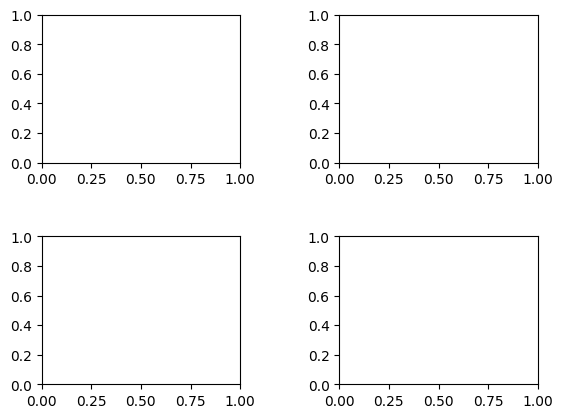

In [7]:
plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 10})
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
labs = [1200, 1500, 1800, 2100]
# reallocIndex = [i for i in range(len(log[1]["fid"]))]
# print(reallocIndex)
for i in range(4):
        axs[i//2, i%2].plot([improvements[i], improvements1[i]], [overheads[i], overheads1[i]], label=str(labs[i])+"kbps", marker="o")
        axs[i//2, i%2].set_ylim([0,50])
        axs[i//2, i%2].set_xlabel("Improvement (%)")
        axs[i//2, i%2].set_ylabel("Overhead (%)")
        axs[i//2, i%2].legend()
plt.savefig("baseline.png")
plt.show()